# DC2 Sprinkler Validation Tests

The most recent Sprinkler Truth Catalogs are in `/global/cscratch1/sd/brycek/example_truth`.

Unlensed SNe population are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/sne_cosmoDC2_v1.1.4_MS_DDF.db`

In [13]:
import os
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

## Lensed AGN validation tests

In [14]:
hdulist = fits.open('/global/cscratch1/sd/brycek/om10_qso_mock.fits')
om10_data = hdulist[1].data

In [15]:
om10_data[:3]

FITS_rec([(14428, 0, 2, 0.062, 264.2409, 0.2182095,  86.19403, 0.04307117, -172.995 , 4.01, -0.8669144, 0.2832836, 22.81, 22.94768, 3.858949, [ 0.9541, -2.7414,  0.    ,  0.    ], [-0.2678,  0.8434,  0.    ,  0.    ], [-0.8809,  3.8125,  0.    ,  0.    ], [26.034,  0.   ,  0.   ,  0.   ], [0., 0., 0., 0.], [0., 0., 0., 0.], 246.488327, 278.000397, -22.8653774, 14.4168491, 0.062, 1432.53, 1380.28, 0., 35956.6, 0., 0., 0.),
          (21703, 0, 2, 0.072, 165.1962, 0.286398 , 131.0021 , 0.06827481, -174.4367, 1.19, -0.4895263, 0.23893  , 22.55, 23.27365, 1.553578, [-1.2262,  0.1993,  0.    ,  0.    ], [ 0.5434, -0.0743,  0.    ,  0.    ], [ 1.8811, -0.5135,  0.    ,  0.    ], [ 0.   ,  7.601,  0.   ,  0.   ], [0., 0., 0., 0.], [0., 0., 0., 0.], 282.910126, 325.115814, -21.6407204, 15.9914694, 0.072, 1708.45, 1569.97, 0.,  8193.9, 0., 0., 0.),
          (31711, 0, 2, 0.082, 155.9553, 0.2997531, -19.01642, 0.05930104, -120.289 , 4.01,  0.1881534, 0.1275117, 22.51, 21.93714, 1.339839, [-0.30

In [16]:
example_truth_folder = '/global/cscratch1/sd/brycek/example_truth'

In [17]:
conn = sqlite3.connect(os.path.join(example_truth_folder, 'agn_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
query = "SELECT * FROM lensed_agn WHERE image_number == 0;"

# DDF unlensed SNe
sprinkled_agn_df = pd.read_sql_query(query,conn)

In [18]:
sprinkled_agn_df.columns

Index(['index', 'unique_id', 'gal_unq_id', 'ra', 'dec', 'redshift', 't_delay',
       'magnorm', 'magnification', 'seed', 'agn_tau_u', 'agn_tau_g',
       'agn_tau_r', 'agn_tau_i', 'agn_tau_z', 'agn_tau_y', 'agn_sf_u',
       'agn_sf_g', 'agn_sf_r', 'agn_sf_i', 'agn_sf_z', 'agn_sf_y',
       'dc2_sys_id', 'lens_cat_sys_id', 'image_number'],
      dtype='object')

## Lensed SNe validation tests

#### Load necessary files

Unlensed SNe population files are in: `/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/` with filenames starting with `sne_cosmoDC2_v1.1.4*`

In [19]:
cosmoDC2_base = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/'

In [20]:
conn  = sqlite3.connect(os.path.join(cosmoDC2_base, 'sne_cosmoDC2_v1.1.4_MS_DDF.db'))
query = "SELECT * FROM sne_params;"

# Unlensed SNe
unlensed_sne_df = pd.read_sql_query(query,conn)

In [21]:
example_truth_folder = '/global/cscratch1/sd/brycek/example_truth'
conn = sqlite3.connect(os.path.join(example_truth_folder, 'sne_truth.db'))

# Pick only the first image of each SN so we don't have duplicate entries of the same SNe
#query = "SELECT * FROM lensed_sne WHERE image_number == 0;"
query = "SELECT * FROM lensed_sne"

# DDF unlensed SNe
sprinkled_sne_df = pd.read_sql_query(query,conn)

### Input SNe catalog

In [22]:
sn_catalog_sys = pd.read_hdf('/global/cscratch1/sd/brycek/glsne_cosmoDC2_v1.1.4.h5', key='system')
sn_catalog_img = pd.read_hdf('/global/cscratch1/sd/brycek/glsne_cosmoDC2_v1.1.4.h5', key='image')

In [23]:
# Checking the file to see what keys are available
with pd.HDFStore('/global/cscratch1/sd/brycek/glsne_cosmoDC2_v1.1.4.h5') as hdf:
    print(hdf.keys())

['/image', '/system', '/system/meta/values_block_2/meta', '/system/meta/values_block_1/meta', '/system/meta/values_block_0/meta']


In [24]:
sn_catalog_sys.head()

,t0,sigma,gamma,e,theta_e,theta_gamma,zs,zl,snx,sny,...,x0,lensgal_magnorm_u,lensgal_magnorm_g,lensgal_magnorm_r,lensgal_magnorm_i,lensgal_magnorm_z,lensgal_magnorm_y,lensgal_sed,lens_av,lens_rv
0,62307.945863,197.670149,0.128101,0.570391,132.165475,135.210348,0.435736,0.152485,-0.136216,0.144903,...,0.000015,18.038430,17.934849,17.876297,17.853722,17.861106,17.841955,galaxySED/Inst.80E09.04Z.spec.gz,0.0,2.0
1,62986.222880,270.972759,0.040137,0.785929,349.848750,76.941654,0.812597,0.106528,0.229110,-0.578431,...,0.000003,17.736074,17.675464,17.672657,17.652261,17.663224,17.629555,galaxySED/Burst.10E10.04Z.spec.gz,0.0,2.0
2,60175.070270,168.759862,0.145709,0.704465,246.352212,103.154255,0.377906,0.036807,0.074938,-0.416329,...,0.000019,14.632392,14.521858,14.451894,14.419520,14.379628,14.347648,galaxySED/Exp.40E09.1Z.spec.gz,0.1,4.0
3,59748.557028,132.459490,0.017375,0.598633,58.483556,133.326378,0.760426,0.034289,0.012960,0.362303,...,0.000003,16.001115,15.945108,15.954887,15.917609,15.889623,15.849615,galaxySED/Exp.40E09.04Z.spec.gz,0.0,2.0
4,61949.847395,118.022925,0.040725,0.593290,160.205181,318.665928,0.608011,0.062039,0.052200,0.120958,...,0.000006,17.650420,17.583731,17.559094,17.545495,17.549512,17.496465,galaxySED/Exp.10E10.04Z.spec.gz,0.0,2.0


### SN Population Comparison

In [25]:
unlensed_sne_df.head()

,htmid_level_6,galaxy_id,c_in,mB,t0_in,x0_in,x1_in,z_in,snid_in,snra_in,sndec_in
0,9021,10562502111,0.035201,18.516489,60772.368515,0.000617,1.477374,0.077278,MS_10199_0,66.115587,-40.866055
1,9023,10562500822,-0.086665,17.966773,63060.297448,0.001028,0.576378,0.073256,MS_10199_1,66.662435,-42.042877
2,9021,10562500735,0.037553,19.078334,62832.166508,0.000370,-0.177457,0.068469,MS_10199_2,65.212146,-41.416473
3,9021,10562502246,0.076715,19.192019,61400.008116,0.000335,-1.344205,0.080189,MS_10199_3,65.469824,-41.109646
4,9023,10562504918,-0.012653,19.388848,61342.657248,0.000278,0.474204,0.115499,MS_10199_5,65.986211,-42.086708


In [26]:
sprinkled_sne_df.head()

,index,unique_id,gal_unq_id,ra,dec,t0,t_delay,MB,magnification,x0,x1,c,host_type,redshift,dc2_sys_id,lens_cat_sys_id,image_number
0,0,1687501546316000,1687501546316000,52.848251,-27.656524,60733.028599,0.000000,-19.241234,1.511290,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,0
1,1,1687501546416001,1687501546416001,52.848257,-27.656530,60733.028599,10.692351,-19.241234,3.003103,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,1
2,2,1687501546516002,1687501546516002,52.848257,-27.656528,60733.028599,11.123024,-19.241234,-1.411856,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,2
3,3,1687501546616003,1687501546616003,52.848252,-27.656529,60733.028599,13.190929,-19.241234,-0.561527,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,3
4,4,1687502575216008,1687502575216008,52.637745,-28.040920,60531.982206,0.000000,-19.120594,2.261117,0.000086,1.0,0.0,kinney-starburst,0.188217,2001,6724378,0


## Checking distribution of SN parameters in the next few blocks

#### $x_0$ distribution

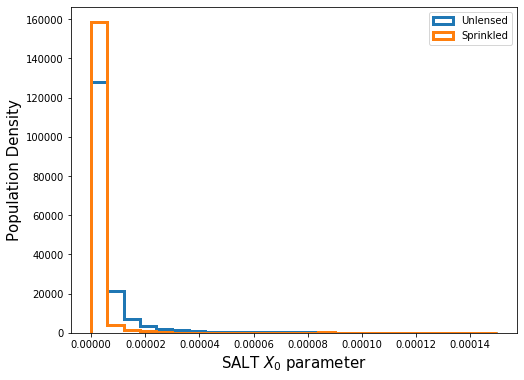

In [27]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(unlensed_sne_df['x0_in'], bins=25, range=(0.0, 0.00015), lw=3, histtype='step', density=True, label='Unlensed')
_          = plt.hist(sprinkled_sne_df['x0'], bins=bins, lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('SALT $X_0$ parameter', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

### $x_1$ distribution

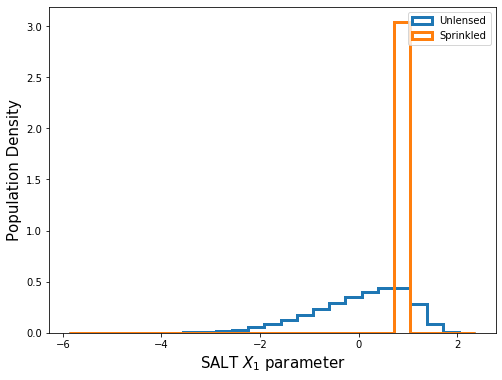

In [28]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(unlensed_sne_df['x1_in'], bins=25, lw=3, histtype='step', density=True, label='Unlensed')
_          = plt.hist(sprinkled_sne_df['x1'], bins=bins, lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('SALT $X_1$ parameter', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

### $c$ distribution

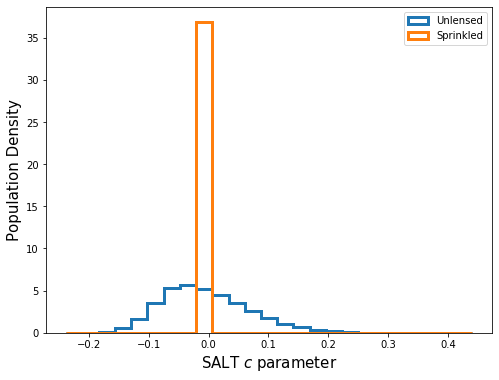

In [29]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(unlensed_sne_df['c_in'], bins=25,  lw=3, histtype='step', density=True, label='Unlensed')
_          = plt.hist(sprinkled_sne_df['c'],   bins=bins,lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('SALT $c$ parameter', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

### Comparing $M_B$ of SN catalog with simulated SN

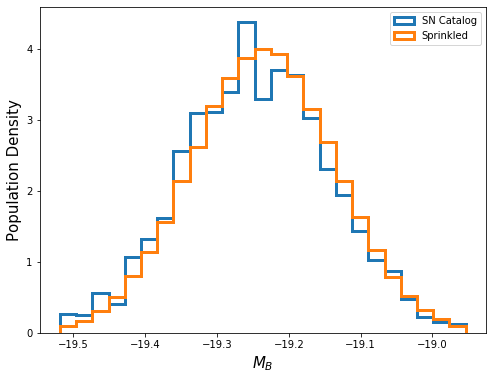

In [30]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(sprinkled_sne_df['MB'], bins=25,  lw=3, histtype='step', density=True, label='SN Catalog')
_          = plt.hist(sn_catalog_sys['MB'],   bins=bins,lw=3, histtype='step', density=True, label='Sprinkled')
#_          = plt.hist(unlensed_sne_df['mB'],  bins=bins,lw=3, histtype='step', density=True, label='Unlensed')
plt.xlabel('$M_B$', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

### All the SNe have $x_1$ = 1 and $c=0$

In [31]:
np.where(sprinkled_sne_df['c'] != 0)

(array([], dtype=int64),)

In [32]:
np.where(sprinkled_sne_df['x1'] != 1)

(array([], dtype=int64),)

### Check distribution of angular separations, magnification, time delay

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [39]:
sprinkled_sne_df.head()

,index,unique_id,gal_unq_id,ra,dec,t0,t_delay,MB,magnification,x0,x1,c,host_type,redshift,dc2_sys_id,lens_cat_sys_id,image_number
0,0,1687501546316000,1687501546316000,52.848251,-27.656524,60733.028599,0.000000,-19.241234,1.511290,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,0
1,1,1687501546416001,1687501546416001,52.848257,-27.656530,60733.028599,10.692351,-19.241234,3.003103,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,1
2,2,1687501546516002,1687501546516002,52.848257,-27.656528,60733.028599,11.123024,-19.241234,-1.411856,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,2
3,3,1687501546616003,1687501546616003,52.848252,-27.656529,60733.028599,13.190929,-19.241234,-0.561527,0.000111,1.0,0.0,kinney-elliptical,0.175884,2000,4068871,3
4,4,1687502575216008,1687502575216008,52.637745,-28.040920,60531.982206,0.000000,-19.120594,2.261117,0.000086,1.0,0.0,kinney-starburst,0.188217,2001,6724378,0


In [ ]:
sysidlist = np.unique(sprinkled_sne_df['lens_cat_sys_id'])
indices_by_system = np.array([np.where(sprinkled_sne_df['lens_cat_sys_id']==sysid)[0] for sysid in sysidlist])

In [78]:
lensedSN_coordinates = SkyCoord(ra=sprinkled_sne_df['ra']*u.degree, dec=sprinkled_sne_df['dec']*u.degree, frame='icrs')
lensedSN_sep_arcsec = []
for idxlist in indices_by_system:
    coords_this_sys = lensedSN_coordinates[idxlist]
    separations_this_sys = coords_this_sys[0].separation(coords_this_sys).to(u.arcsecond)
    lensedSN_sep_arcsec += (separations_this_sys.value).tolist()
lensedSN_sep_arcsec = np.array(lensedSN_sep_arcsec).flatten()

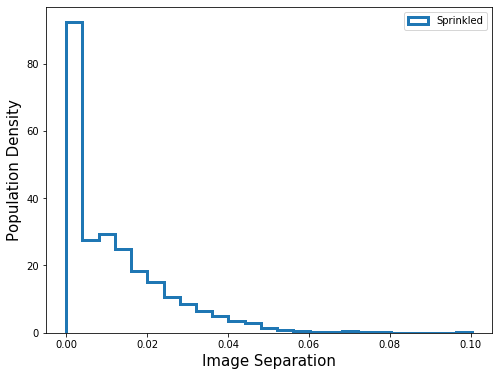

In [79]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(lensedSN_sep_arcsec, bins=25,  lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('Image Separation', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

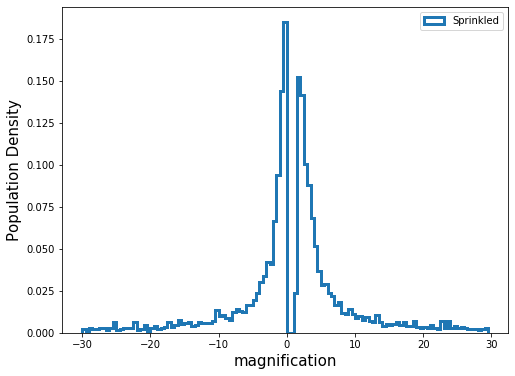

In [89]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(sprinkled_sne_df['magnification'], bins=np.arange(-30,30,0.5),  lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('magnification', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

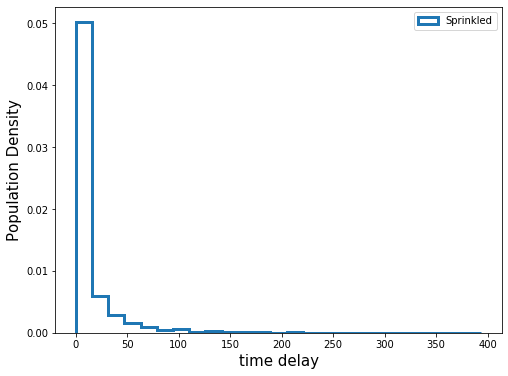

In [91]:
fig        = plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(sprinkled_sne_df['t_delay'], bins=25,  lw=3, histtype='step', density=True, label='Sprinkled')
plt.xlabel('time delay', fontsize=15)
plt.ylabel('Population Density',   fontsize=15)
plt.legend(loc='best')

(0.03, 1000)

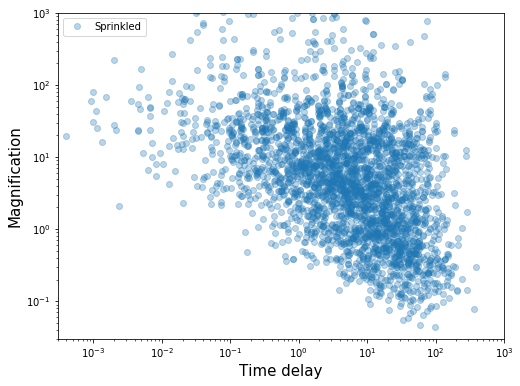

In [97]:
fig        = plt.figure(figsize=(8, 6))
#plt.plot(lensedSN_sep_arcsec, sprinkled_sne_df['magnification'],  ls=' ', marker='o', alpha=0.3, label='Sprinkled')
plt.loglog(sprinkled_sne_df['t_delay'], np.abs(sprinkled_sne_df['magnification']),  ls=' ', marker='o', alpha=0.3, label='Sprinkled')

plt.xlabel('Time delay', fontsize=15)
plt.ylabel('Magnification',   fontsize=15)
plt.legend(loc='best')

ax = plt.gca()
ax.set_xlim(3e-4, 1000)
ax.set_ylim(0.03, 1000)

### Matching time-delayed SNe light-curves with the original light-curves after phase shift and de-magnification

In [ ]:
from lsst.sims.catUtils.supernovae    import SNObject
from lsst.sims.photUtils.BandpassDict import BandpassDict

LSST_BPass = BandpassDict.loadTotalBandpassesFromFiles()


def Get_SN_Flux(ra , dec , redshift, t0, x0, x1, c, StartTime, EndTime, band, n):
    '''
    StartTime: could be t0-5 days (depending on redshift)
    EndTime: could be t0+40 days
    band: LSST filter
    n: number of points wanted for the time array
    '''
    
    
    # Setting up the supernova with the light-curve parameters from Sprinkled catalog
    sn_mod = SNObject(ra = ra, dec = dec)
    
    sn_mod.set(z  = redshift,   
               t0 = t0, 
               x0 = x0, 
               x1 = x1, 
               c  = c)

    # create a time array
    times = np.arange(StartTime, EndTime, n)
    
    # get fluxes
    for mjd in times:
        flux    = sn_mod.catsimBandFlux(mjd, LSST_BPass[band])
        mag     = sn_mod.catsimBandMag(LSST_BPass[band], mjd, flux)
        
    return flux, mag
    

   
SN_Example_flux, SN_Example_mag = Get_SN_Flux(sprinkled_sne_df['ra'][0] , 
                                             sprinkled_sne_df['dec'][0] , 
                                             sprinkled_sne_df['redshift'][0], 
                                             sprinkled_sne_df['t0'][0], 
                                             sprinkled_sne_df['x0'][0], 
                                             sprinkled_sne_df['x1'][0], 
                                             sprinkled_sne_df['c'][0], 
                                             sprinkled_sne_df['t0'][0]-5, 
                                             sprinkled_sne_df['t0'][0]+40, 
                                             'r', 10)

'''
# Test

# Setting up the supernova with the light-curve parameters from Sprinkled catalog
sn_mod = SNObject(ra = sprinkled_sne_df['ra'], dec = sprinkled_sne_df['dec'])

sn_mod.set(z  = sprinkled_sne_df['redshift'],   
           t0 = sprinkled_sne_df['t0'], 
           x1 = sprinkled_sne_df['x1'], 
           c  = sprinkled_sne_df['c'], 
           x0 = sprinkled_sne_df['x0'])

mask = (time_delay!=0.0)

times = np.arange(prinkled_sne_df[t0][mask][0]-5, prinkled_sne_df[t0][mask][0]s+40)
filt  = 'r'

    
for mjd in times:
    flux    = sn_mod.catsimBandFlux(mjd, LSST_BPass[filt])
    mag     = sn_mod.catsimBandMag(LSST_BPass[filt], mjd, flux)
    #flux_er = sn_mod.catsimBandFluxError(mjd, LSST_BPass[filt], m5, flux)
    #mag_er  = sn_mod.catsimBandMagError(mjd,  LSST_BPass[filt], m5, magnitude=mag)
'''